In [3]:
import pandas as pd
import numpy as np
import collections
import math
import matplotlib.pyplot as plt
import os
import json
import matplotlib.ticker as ticker

In [4]:
# group by key item
def groupByForPlotData(filepath='../data/CauseDesc_Year_Age_Cleaned.csv',grp_catagory='Strata_Name',x_axis='Year',y_axis='All causes (total)'):
    assert isinstance(filepath, str) and os.path.exists(filepath), 'Invalid path'
    df=pd.read_csv(filepath)
    grp=df.groupby(grp_catagory)
    grp_dict=collections.defaultdict(list)
    for index, row in grp:
        grp_dict[index].append(row)
    # get the x-axis and y-axis for each corresponding key item
    plot_data=collections.defaultdict(list)
    for strata_name in grp_dict:
        for index,row in grp_dict[strata_name][0].iloc[:,:].iterrows():
            # get the plot data
            plot_data[strata_name].append((getattr(row,x_axis),getattr(row,y_axis))) 
    return plot_data

In [5]:
def yearBasedPlot(plot_data):
    """
    Visualize age population data according to years
    """
    # print(type(plot_data))
    for key in plot_data:
        plt.plot([d[0] for d in plot_data[key]], [d[1] for d in plot_data[key]], label=key, marker='o')
    plt.ylim(0, 100000)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.show()

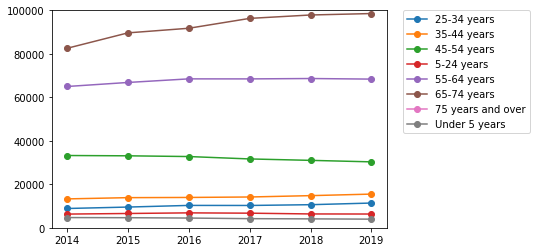

In [6]:
outData=groupByForPlotData()
yearBasedPlot(outData)

In [7]:
filepath='../data/death.csv'
df=pd.read_csv(filepath)

In [8]:
countyTotalDict={}
cnt=0
for index,row in df.iterrows():
    if getattr(row,'Strata_Name')=='Total Population' and getattr(row,'Cause_Desc')=='All causes (total)':
        if getattr(row,'County')=='Alameda':
            cnt+=1
            # print(row)
        countyTotalDict[(getattr(row,'County'),getattr(row,'Geography_Type'),getattr(row,'Year'))]=getattr(row,'Count')

In [9]:
countyFemaleDict={}
for index,row in df.iterrows():
    if getattr(row,'Strata')=='Gender' and getattr(row,'Strata_Name')=='Female':
        if getattr(row,'Geography_Type')=='Occurrence':
            countyFemaleDict[(getattr(row,'County'),getattr(row,'Cause'),getattr(row,'Year'))]=getattr(row,'Count')

In [10]:
countyAgeDictOcc={}
countyAgeDictRes={}
for index,row in df.iterrows():
    if getattr(row,'Strata')=='Age':
        if getattr(row,'Geography_Type')=='Occurrence':
            # (county, age_group, year, cause=all)
            countyAgeDictOcc[(getattr(row,'County'),getattr(row,'Strata_Name'),getattr(row,'Year'),getattr(row,'Cause'))]=getattr(row,'Count')
        elif getattr(row,'Geography_Type')=='Residence':
            # (county, age_group, year, cause=all)
            countyAgeDictRes[(getattr(row,'County'),getattr(row,'Strata_Name'),getattr(row,'Year'),getattr(row,'Cause'))]=getattr(row,'Count')

In [11]:
countyTotalDictOcc={}
countyTotalDictRes={}
for key in countyAgeDictOcc:
    countyTotalDictOcc[(key[0],key[2])]=countyTotalDictOcc.get((key[0],key[2]),0)+countyAgeDictOcc[key]
for key in countyAgeDictRes:
    countyTotalDictRes[(key[0],key[2])]=countyTotalDictRes.get((key[0],key[2]),0)+countyAgeDictRes[key]

In [12]:
countyRatioDictOcc={}
countyRatioDictRes={}
for key in countyAgeDictOcc:
    if not math.isnan(countyAgeDictOcc[key]) and not math.isnan(countyTotalDictOcc[(key[0],key[2])]):
        countyRatioDictOcc[key]=countyAgeDictOcc[key]/countyTotalDictOcc[(key[0],key[2])]
for key in countyAgeDictRes:
    if not math.isnan(countyAgeDictRes[key]) and not math.isnan(countyTotalDictRes[(key[0],key[2])]):
        countyRatioDictRes[key]=countyAgeDictRes[key]/countyTotalDictRes[(key[0],key[2])]

In [13]:
# In 2019, the ratio of death in three age groups--'Under 1 year', '25-34 years' and '75-84 years' in different counties, where its total number of death in that year is larger than 10000 or in the range of 500 to 1000.
Year=2019
cat1,cat2,cat3,cat4,cat5='Under 1 year', '1-4 years','5-14 years', '25-34 years', '75-84 years'
countyName=[]
ratio1=[]
ratio2=[]
ratio3=[]
ratio4=[]
ratio5=[]
countyExaminedDict10000_2019={}
countyExaminedDict1000_2019={}
for key in countyTotalDictOcc:
    if key[1]==Year:
        if countyTotalDictOcc[key]>10000:
            countyExaminedDict10000_2019[key]=countyTotalDictOcc[key]
            countyName.append(key[0])
        elif 500<=countyTotalDictOcc[key]<1000:
            countyExaminedDict1000_2019[key]=countyTotalDictOcc[key]
for key in countyExaminedDict1000_2019:
    countyName.append(key[0])

for county in countyName:
    ratio1.append(countyRatioDictOcc[(county,cat1,Year,'ALL')])
    ratio2.append(countyRatioDictOcc[(county,cat2,Year,'ALL')])
    ratio3.append(countyRatioDictOcc[(county,cat3,Year,'ALL')])
    ratio4.append(countyRatioDictOcc[(county,cat4,Year,'ALL')])
    ratio5.append(countyRatioDictOcc[(county,cat5,Year,'ALL')])

In [16]:
def yearBasedPlot(x_axis,y_axises):
    """
    Visualize age population data according to years
    y_axises: input format as lists of [label, data]
    """
    # print(type(plot_data))
    for y_axis in y_axises:
        plt.plot(x_axis, y_axis[1], label=y_axis[0], marker='o')
    plt.ylim(0, 0.3)
    plt.xticks(rotation=30)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.title('death rate of of 5 different age groups of all counties in year 2019')
    plt.show()

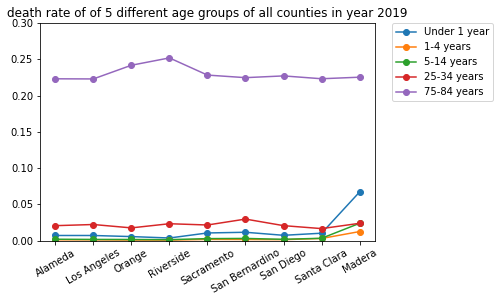

In [17]:
# higher death rate in the new born is more likely leading to lower popularity
yearBasedPlot(x_axis=countyName,y_axises=[[cat1,ratio1],[cat2,ratio2],[cat3,ratio3],[cat4,ratio4],[cat5,ratio5]])

In [152]:
# In Madera, Los Angeles and San Diego, the ratio of death in all age groups in different years from 2014 to 2019
ageGroup=['Under 1 year','1-4 years','5-14 years','15-24 years','25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','75-84 years','85 years and over']
countyGroup=['Madera','Los Angeles','San Diego']
years=[2014+i for i in range(6)]
years.remove(2017)
ageGroupDict=collections.defaultdict(list)
for age in ageGroup:
    for county in countyGroup:
        for year in years:
            if (county,age,year,'ALL') in countyRatioDictOcc:
                ageGroupDict[(county,age)].append(countyRatioDictOcc[(county,age,year,'ALL')])
            else:
                ageGroupDict[(county,age)].append(0)


In [166]:
def yearBasedPlot(x_axis,plot_data,keyCountyName):
    """
    Visualize age population data according to years
    """
    # print(type(plot_data))
    for key in plot_data:
        if key[0]==keyCountyName:
            plt.plot(x_axis, plot_data[key], label=key[1], marker='o')
    plt.ylim(0, 0.4)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.title('death rate of '+keyCountyName) 
    plt.show()

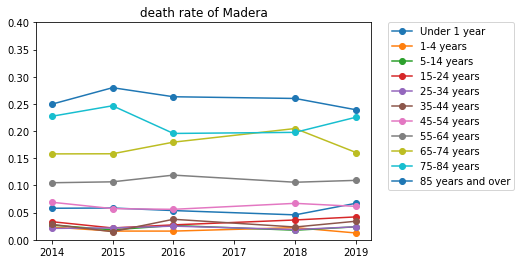

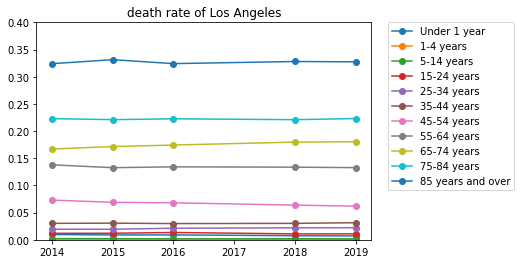

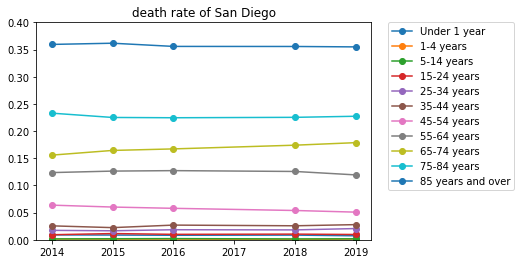

In [167]:
for Name in countyGroup:
    yearBasedPlot(x_axis=years,plot_data=ageGroupDict,keyCountyName=Name)